<a href="https://colab.research.google.com/github/jkroberts1/CS598_DLH-Spring24-Group47/blob/main/CS_598_DLH_Project_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/CS598_DLH/Dataset2

Mounted at /content/drive
/content/drive/My Drive/CS598_DLH/Dataset2


# GitHub Repository & Video Presentation

To gain access to the input data in an easy way you can check the references [5] source which is data from the author of the paper. You can also use the link in the GitHub repo's README file.

**LINK TO GITHUB REPO**
https://github.com/jkroberts1/CS598_DLH-Spring24-Group47.git

**LINK TO VIDEO PRESENTATION**


# Introduction
There are many previous studies that support the claim that anticancer drug sensitivity in cell
lines are not tissue-specific, because of this tissue-specific drugs can be of benefit to other
tissues. This project aims to develop a drug synergy prediction model for understudied tissues in
an attempt to overcome data scarcity (Kim et al, 2021). With this synergy prediction model we
can rank synergistic drug combinations in understudied tissues.

This problem is a data processing problem for diseases. There is simply not enough data available to be processed for cancer in areas that are hard to perform medical analysis on. Therefore what this paper aims to do is, using drugs that work well on a given tissue in the body, predict the effectiveness on the drug on a different yet similar tissue in the body. Medical study already indicates what kinds of tissue are similar to highly studied tissues and in what ways they are similar.

The innovations of the paper is that this will not only overcome the challenge of not having enough data on tissues that get cancer, once successful this will add to the data on those tissues. Therefore this project works to single-handedly solve the issues surrounding data-poor tissues.

The paper reports it's own accuracy as follows: "Our drug response prediction model was able to successfully bypass the posttreatment features while achieving competitive accuracy (Kim et al, 2021)". It's major contribution to the research regime is the transfer of learning between data-rich and data-poor in-silico experiments. Outside of the goals of the model there is much to be said about how this paper sets a precedent for future papers to tackle harder to experiment parts of the body.


# Scope of Reproducibility

The hypothesis we will test from the paper in this project is as follows

1.   If a model is trained to predict drug effectiveness on
well studied tissues, then that model can be transferred to a “student” model trained on
understudied tissues while retaining drug effectiveness prediction accuracy.

What this hypothesis is stating is a direct overview of the goals of the paper and project. The
project is aiming to build a model that aims to show a direct synergy between well studied and
understudied tissues and how effective drugs are on them.

This is feasible because we know from previous studies that cancer medication does not show higher efficacy in targeted cell lines (Jaeger et al., 2015). To improve the performance of training
with tissues that don’t have as much data we can use transfer learning where we build a teacher
model that utilizes the well suited data and then transfers those output parameters as inputs to a
model with less data.

We aim to reproduce the results of the paper and then also perform ablations on the model to test it's resiliency. We will be using the original code in order to replicate the results of the project and then test out the ablations and any improvements.



# ENVIRONMENT

Python version: 3.10

Packages needed:

1.   numpy
2.   pickle
3. utilities
4. matplotlib
5. mpl_tookits
6. rdkit
7. re
8. seaborn
9. math
10. pandas
11. torch
12. sklearn
13. time
14. logging
15. pdb

# Methodology

## Data Overview

To access the data, one can reference the link to the google drive in the References section [5]. The data for running this notebook can be downloaded from there. However, if one wants to gain access to the original data referenced in the paper then can follow the links in each section of Data Preprocessing.

##Data Preprocessing (1)

The following section(s) will go over the data that we use and load into the model. It will cover the datasets we use, and what we gain from them.

First we start with the DrugComb data which can be accessed here:
https://drugcomb.fimm.fi/

This dataset has records on 4150 drugs and 112 cell lines. We show a description of the data set with the .head() command.

Refer to comments in the code to see how the data is manipulated.

In [2]:
%pip install rdkit

import pandas as pd
import numpy as np
import pickle
from utilities import Mapping

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import rdkit
from rdkit import Chem
from rdkit.Chem import MACCSkeys

import re

import seaborn as sns
from matplotlib.colors import LogNorm
import math

data_path=''
external_data_path=''

summary=pd.read_csv(data_path+'summary_v_1_5.csv')
#Block to StudyID mapping
source=pd.read_csv(data_path+'source.csv')

# Create a dictionary mapping study names to study IDs
study_id_map = dict(zip(source['sname'], source['id']))

summary['study_name'] = summary['study_name'].str.strip()
summary['study_id'] = summary['study_name'].map(study_id_map)

summary_study = summary.sort_values(by='block_id')

cell_line=pd.read_csv(data_path+'cell_line.csv')
drug=pd.read_csv(data_path+'drug.csv')

summary_study = summary_study[summary_study['cell_line_name'].isin(cell_line['name'])]
summary_study = summary_study[summary_study['drug_row'].isin(drug['dname'])]
summary_study = summary_study[summary_study['drug_col'].isin(drug['dname'])]

study_ids=['', 'ONEIL','CLOUD','ALMANAC','FORCINA','NCATS_ATL','Mathews','NCATS_DIPG','NCATS_ES(FAKi/AURKi)','NCATS_ES(Nampt+PARP)','Wilson','NCATS_HL','Yohe','NCATS_2D_3D','Phelan','NCATS_MDR_CS','CCLE','CTRPv2','FIMM','gCSI','GDSC1','GRAY','UHNBreast','BEATAML'] #from study.csv
summary_study = summary_study[summary_study['study_name'].isin(study_ids)]

summary_study.head()



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 34.7 MB/s eta 0:00:00


<ipython-input-2-4d7085a0b5bb>:25: DtypeWarning: Columns (2,7,19,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  summary=pd.read_csv(data_path+'summary_v_1_5.csv')


,block_id,drug_row,drug_col,cell_line_name,study_name,tissue_name,conc_row_unit,conc_col_unit,ic50_row,ic50_col,...,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,drug_row_clinical_phase,drug_col_clinical_phase,drug_row_target_name,drug_col_target_name,study_id
1012548,1,5-Fluorouracil,Veliparib,A2058,ONEIL,skin,uM,uM,5.126836,3.267734,...,19.398,3.865915,-2.951386,5.536903,6.256584,4,3,Prelamin-A/C; Survival motor neuron protein; T...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...,1
1012549,2,5-Fluorouracil,Veliparib,A2058,ONEIL,skin,uM,uM,5.126836,3.267734,...,15.989,8.247403,3.125927,11.614215,12.333896,4,3,Prelamin-A/C; Survival motor neuron protein; T...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...,1
1012550,3,5-Fluorouracil,Veliparib,A2058,ONEIL,skin,uM,uM,5.126836,3.267734,...,18.430,6.063440,2.452239,10.940528,11.660209,4,3,Prelamin-A/C; Survival motor neuron protein; T...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...,1
1012551,4,5-Fluorouracil,Veliparib,A2058,ONEIL,skin,uM,uM,5.126836,3.267734,...,12.545,-4.280231,-4.062761,4.425528,5.145209,4,3,Prelamin-A/C; Survival motor neuron protein; T...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...,1
1012552,5,5-Fluorouracil,MK-1775,A2058,ONEIL,skin,uM,uM,5.126836,0.266027,...,41.683,12.284698,10.409407,18.656340,15.765467,4,2,Prelamin-A/C; Survival motor neuron protein; T...,Serine/threonine-protein kinase TBK1; Protein ...,1


In [3]:

summary_study.head()


,block_id,drug_row,drug_col,cell_line_name,study_name,tissue_name,conc_row_unit,conc_col_unit,ic50_row,ic50_col,...,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,drug_row_clinical_phase,drug_col_clinical_phase,drug_row_target_name,drug_col_target_name,study_id
1012548,1,5-Fluorouracil,Veliparib,A2058,ONEIL,skin,uM,uM,5.126836,3.267734,...,19.398,3.865915,-2.951386,5.536903,6.256584,4,3,Prelamin-A/C; Survival motor neuron protein; T...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...,1
1012549,2,5-Fluorouracil,Veliparib,A2058,ONEIL,skin,uM,uM,5.126836,3.267734,...,15.989,8.247403,3.125927,11.614215,12.333896,4,3,Prelamin-A/C; Survival motor neuron protein; T...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...,1
1012550,3,5-Fluorouracil,Veliparib,A2058,ONEIL,skin,uM,uM,5.126836,3.267734,...,18.430,6.063440,2.452239,10.940528,11.660209,4,3,Prelamin-A/C; Survival motor neuron protein; T...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...,1
1012551,4,5-Fluorouracil,Veliparib,A2058,ONEIL,skin,uM,uM,5.126836,3.267734,...,12.545,-4.280231,-4.062761,4.425528,5.145209,4,3,Prelamin-A/C; Survival motor neuron protein; T...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...,1
1012552,5,5-Fluorouracil,MK-1775,A2058,ONEIL,skin,uM,uM,5.126836,0.266027,...,41.683,12.284698,10.409407,18.656340,15.765467,4,2,Prelamin-A/C; Survival motor neuron protein; T...,Serine/threonine-protein kinase TBK1; Protein ...,1


Text(0, 0.5, 'counts')

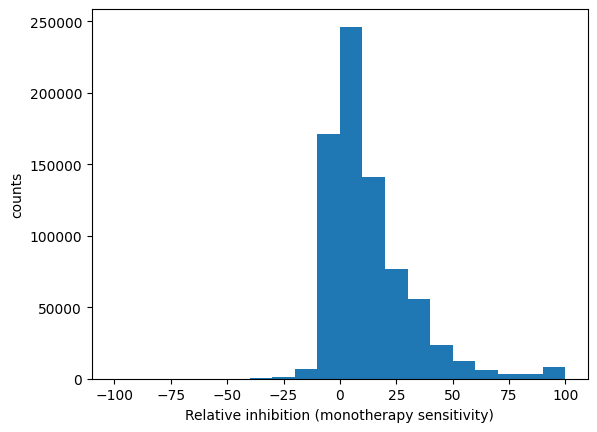

In [4]:
# take average of replicates experiments
#summary_study = summary_study.dropna()

columns_to_convert = ['ri_row', 'ri_col', 'synergy_loewe']

# Convert columns to numeric, coercing errors to NaN
for column in columns_to_convert:
    summary_study[column] = pd.to_numeric(summary_study[column], errors='coerce')
# Now perform the aggregation
summary_mean = summary_study.groupby(['drug_row', 'drug_col', 'cell_line_name', 'study_id'], as_index=False).agg({
    'ri_row': 'mean',
    'ri_col': 'mean',
    'synergy_loewe': 'mean'
})

sensitivity=pd.concat([summary_mean.loc[:, ['drug_row', 'cell_line_name', 'ri_row']].rename(columns={'drug_row':'drug', 'ri_row':'ri'}),
          summary_mean.loc[:, ['drug_col', 'cell_line_name', 'ri_col']].rename(columns={'drug_col':'drug', 'ri_col':'ri'})])



plt.hist(sensitivity['ri'], bins=20, range=[-100,100])
plt.xlabel("Relative inhibition (monotherapy sensitivity)")
plt.ylabel("counts")
#plt.savefig(data_path+'ri_cnt.png',  bbox_inches='tight', dpi=200)

Text(0, 0.5, 'counts')

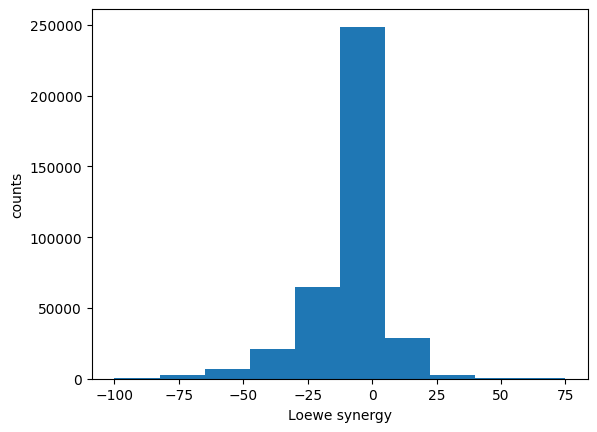

In [5]:
plt.hist(((summary_mean.loc[:,'synergy_loewe'].values.reshape(-1))), range=[-100, 75])
plt.xlabel("Loewe synergy")
plt.ylabel("counts")
#plt.savefig(data_path+'syn_cnt.png', bbox_inches='tight', dpi=200)

(-100.0, 100.0)

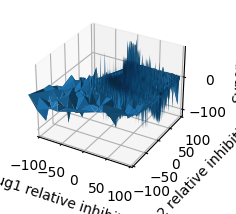

In [6]:

X=summary_mean.loc[:,'ri_row'].to_numpy()
Y=summary_mean.loc[:,'ri_col'].to_numpy()
Z=summary_mean.loc[:,'synergy_loewe'].to_numpy()

Z = np.nan_to_num(Z)

fig = plt.figure()
ax = fig.add_subplot(2, 1, 2, projection='3d')
ax.plot_trisurf(X,Y,Z)

ax.set_xlabel('Drug1 relative inhibition')
ax.set_ylabel('Durg2 relative inhibition')
ax.set_zlabel('Synergy')
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
#fig.savefig(data_path+'ri_synergy_3d.png', dpi=200)

In [7]:
codes={'drugs': Mapping(set(summary_mean['drug_row'].unique()).union(set(summary_mean['drug_col'].unique()))),
      'cell':Mapping(summary_mean['cell_line_name'].unique())}

In [8]:
summary_mean['drug_col']=summary_mean['drug_col'].apply(lambda x: codes['drugs'].item2idx[x])
summary_mean['drug_row']=summary_mean['drug_row'].apply(lambda x: codes['drugs'].item2idx[x])
summary_mean['cell_line_name']=summary_mean['cell_line_name'].apply(lambda x: codes['cell'].item2idx[x])

In [9]:
summary_mean.head()


,drug_row,drug_col,cell_line_name,study_id,ri_row,ri_col,synergy_loewe
0,2617,3003,0,4,-21.079400,17.392589,4.436431
1,1515,3003,0,4,-4.051616,17.392589,10.755529
2,904,1413,1,11,-71.949000,9.755000,-6.188270
3,904,3003,0,4,-9.231525,17.392589,0.739056
4,63,1413,1,11,-12.272000,15.133000,-18.680123


In [10]:
summary_mean.to_pickle(data_path+'summary_mean.p')


## Data Preprocessing (2)
### **Drug's molescule structure**

This data comes from SMILES. This is a linear notation to express the chemical compounds in a unique manner. The data can be accessed here:
https://www.dna.bio.keio.ac.jp/smiles/

This will be used in the language processing model called Transformer to encode the sequences.

In [11]:
#FILTERING and ERROR CORRECTION
drug=pd.read_csv(data_path+'drug.csv')
drug.drop('id', axis=1, inplace=True)
drug['id']=drug['dname'].apply(lambda x: codes['drugs'].item2idx.get(x))
drug=drug.loc[~drug['id'].isna(),:]

drug.loc[drug['cid']==57519530,'smiles']='CC(C)CC1C(=O)NC(C(=O)NC(CCCC=CCCCCCCC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)N1)CCCNC(=N)N)CC2=CNC3=CC=CC=C32)CC(C)C)CC(=O)N)(C)NC(=O)C(CC4=CC=CC=C4)NC(=O)C(C(C)O)NC(=O)C(CCC(=O)N)NC(=O)C(CCC(=O)N)NC(=O)C(CO)NC(=O)C(CCC(=O)N)NC(=O)CCNC(=O)C)(C)C(=O)NC(CCC(=O)N)C(=O)NC(CC(=O)N)C(=O)N)CC(C)C'
drug.loc[drug['cid']==73265323,'smiles']='CC(C)CCCCCCCC(=O)NC1C(C(C(OC1OC2=C3C=C4C=C2OC5=C(C=C(C=C5)C(C6C(=O)NC(C7=C(C(=CC(=C7)O)OC8C(C(C(C(O8)CO)O)O)O)C9=C(C=CC(=C9)C(C(=O)N6)NC(=O)C4NC(=O)C1C2=CC(=CC(=C2)OC2=C(C=CC(=C2)C(C(=O)NC(CC2=CC(=C(O3)C=C2)Cl)C(=O)N1)N)O)O)O)C(=O)O)OC1C(C(C(C(O1)CO)O)O)NC(=O)C)Cl)CO)O)O'
drug.loc[drug['cid']==16131923,'smiles']='CCCCCCCCCC(=O)NC1C(C(C(OC1OC2=C3C=C4C=C2OC5=C(C=C(C=C5)C(C6C(=O)NC(C7=C(C(=CC(=C7)O)OC8C(C(C(C(O8)CO)O)O)O)C9=C(C=CC(=C9)C(C(=O)N6)NC(=O)C4NC(=O)C1C2=CC(=CC(=C2)OC2=C(C=CC(=C2)C(C(=O)NC(CC2=CC(=C(O3)C=C2)Cl)C(=O)N1)N)O)O)O)C(=O)O)OC1C(C(C(C(O1)CO)O)O)NC(=O)C)Cl)CO)O)O'
print(drug)
drug.to_csv(data_path+'drug_clean.csv',index=False)

                     dname                 chembl_id  \
1           5-Fluorouracil                 CHEMBL185   
2                Veliparib              CHEMBL506871   
3                  MK-1775             CHEMBL1976040   
4              915019-65-7             CHEMBL1879463   
5               Bortezomib              CHEMBL325041   
...                    ...                       ...   
8165  BENZTROPINE MESYLATE              CHEMBL558805   
8333           artemisinin                       NaN   
8335             quinidine              CHEMBL512340   
8369          alfacalcidol             CHEMBL2362510   
8390       chlorprothixene  CHEMBL90125; CHEMBL90125   

                         inchikey  \
1     GHASVSINZRGABV-UHFFFAOYSA-N   
2     JNAHVYVRKWKWKQ-CYBMUJFWSA-N   
3     BKWJAKQVGHWELA-UHFFFAOYSA-N   
4     JOGKUKXHTYWRGZ-UHFFFAOYSA-N   
5     GXJABQQUPOEUTA-RDJZCZTQSA-N   
...                           ...   
8165  GIJXKZJWITVLHI-RTBURBONSA-N   
8333  BLUAFEHZUWYNDE-GEURJLFFSA

In [12]:
#GET MACCS FINGERPRINT
drug=pd.read_csv(data_path+'drug_clean.csv')
drug['fps'] = drug['smiles'].apply(lambda x: list(MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(x.replace("\\", "").replace(";","")))) if isinstance(x, str) and Chem.MolFromSmiles(x.replace("\\", "").replace(";","")) is not None else [])

drug.to_pickle(data_path+'drug_clean_fp.p')

In [13]:
drug=pickle.load(open(data_path+'drug_clean_fp.p', 'rb'))
drug['id']=drug['id'].apply(lambda x: int(x))

In [14]:
drug

,dname,chembl_id,inchikey,smiles,cid,molecular_formula,clinical_phase,cid_m,cid_s,stitch_name,drugbank_id,kegg_id,synonyms,target_name,target_type,id,fps
0,5-Fluorouracil,CHEMBL185,GHASVSINZRGABV-UHFFFAOYSA-N,C1=C(C(=O)NC(=O)N1)F,3385.0,C4H3FN2O2,4.0,CIDm00003385,CIDs00003385,5-fluorouracil,DB00544,D00584,5-Fluorouracil; fluorouracil; 51-21-8; 5-FU; F...,Prelamin-A\/C; Survival motor neuron protein; ...,single protein; nucleic acid,1188,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Veliparib,CHEMBL506871,JNAHVYVRKWKWKQ-CYBMUJFWSA-N,CC1(CCCN1)C2=NC3=C(C=CC=C3N2)C(=O)N,11960529.0,C13H16N4O,3.0,CIDm11842604,CIDs11960529,veliparib,DB07232,D09692,Veliparib; 912444-00-9; ABT-888; ABT 888; ABT-...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...,single protein; protein family,1112,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,MK-1775,CHEMBL1976040,BKWJAKQVGHWELA-UHFFFAOYSA-N,CC(C)(C1=NC(=CC=C1)N2C3=NC(=NC=C3C(=O)N2CC=C)N...,24856436.0,C27H32N8O2,2.0,CIDm24856436,CIDs24856436,MK-1775,DB11740,NaN,MK-1775; 955365-80-7; Adavosertib; MK1775; MK ...,Serine\/threonine-protein kinase TBK1; Protein...,single protein,882,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,915019-65-7,CHEMBL1879463,JOGKUKXHTYWRGZ-UHFFFAOYSA-N,CC(C)(C#N)C1=CC=C(C=C1)N2C3=C4C=C(C=CC4=NC=C3N...,11977753.0,C30H23N5O,2.0,CIDm11977753,CIDs11977753,NVP-BEZ235,DB11651,D10552,915019-65-7; dactolisib; NVP-BEZ235; BEZ235; N...,ALK tyrosine kinase receptor; Macrophage colon...,single protein; protein complex; protein compl...,246,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Bortezomib,CHEMBL325041,GXJABQQUPOEUTA-RDJZCZTQSA-N,B(C(CC(C)C)NC(=O)C(CC1=CC=CC=C1)NC(=O)C2=NC=CN...,387447.0,C19H25BN4O4,4.0,CIDm00093860,CIDs00387447,bortezomib,DB00188,D03150,Bortezomib; 179324-69-7; Velcade; PS-341; LDP-...,Cathepsin G; Beta-chymotrypsin; Proteasome sub...,single protein; protein complex group; protein...,1172,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,BENZTROPINE MESYLATE,CHEMBL558805,GIJXKZJWITVLHI-RTBURBONSA-N,CN1[C@@H]2CC[C@@H]1CC(OC(c1ccccc1)c1ccccc1)C2,8584.0,C21H25NO,NaN,CIDm00002344,CIDs00006832,benztropine,NaN,C06846,BENZTROPINE MESYLATE; Benztropine mesylate [US...,NaN,NaN,2569,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3244,artemisinin,NaN,BLUAFEHZUWYNDE-GEURJLFFSA-N,CC1CCC2C(C(=O)OC3C24C1CCC(O3)(OO4)C)C,5458876.0,C15H22O5,3.0,CIDm00002240,CIDs05458876,artemisinin,NaN,NaN,artemisinin; Artemisinine; NCGC00160207-01; DS...,NaN,NaN,1765,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3245,quinidine,CHEMBL512340,LOUPRKONTZGTKE-VPCNSNALSA-N,COC1=CC2=C(C=CN=C2C=C1)C(C3CC4CCN3CC4C=C)O,6604605.0,C20H24N2O2,3.0,CIDm00001065,CIDs06604605,quinine,NaN,NaN,quinidine; Conquinine; 56-54-2; Quindine; CHEM...,NaN,NaN,638,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3246,alfacalcidol,CHEMBL2362510,OFHCOWSQAMBJIW-GITLSTMWSA-N,CC(C)CCCC(C)C1CCC2C1(CCCC2=CC=C3CC(CC(C3=C)O)O)C,5284515.0,C27H44O2,4.0,CIDm00002091,CIDs05284515,alfacalcidol,NaN,NaN,alfacalcidol; Etalpha; 41294-56-8; 1alpha-Hydr...,NaN,NaN,1608,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [15]:
#Convert SMILES's character into index
drug['smiles'] = drug['smiles'].astype(str)
seqs=drug['smiles'].to_list()
chars=set([char for seq in seqs for char in seq])
chars = ['']+list(chars) #for zero embedding
codes['mole']=Mapping(chars)
drug['smiles']=drug['smiles'].apply(lambda x : [codes['mole'].item2idx[char] for char in x])

## Data Preprocessing (3)
### **Drug's target gene**

This section will incorporate 3 different drug databases in order to get genomic features. These 3 databases are DrugBank, Therapeutic Target Database (TTD), and NIH-LINC.

DrugBank:https://go.drugbank.com/releases/latest

TTD: https://db.idrblab.net/ttd/full-data-download

NIH-LINC: https://lincs.hms.harvard.edu/db/datasets/20316/main

In [16]:
#Merge target genes from DrugBank
drug_DrugBank_target=pd.read_csv(external_data_path+'genetic_features/drug/drug_DrugBank_target.csv')
drug_DrugBank_target=drug_DrugBank_target[['Gene', 'drugbank_id']].groupby('drugbank_id').agg(lambda x: set(x)).applymap(list).reset_index()
drug=pd.merge(drug, drug_DrugBank_target, how='left', on='drugbank_id')
drug.rename(columns={'Gene':'gene_drugbank'}, inplace=True)
drug['gene_drugbank']=drug['gene_drugbank'].apply(lambda x: [] if type(x) is float else x)

In [17]:
#Merge target genes from TTD
drug_TTD_target=pd.read_csv(external_data_path+'genetic_features/drug/drug_TTD_target.csv')
drug_TTD_target['TTD_TARGETS']=drug_TTD_target['TTD_TARGETS'].apply(lambda x: re.split(',|;', x))
drug=pd.merge(drug, drug_TTD_target.loc[:,['TTD_TARGETS', 'cid']],how='left', on='cid')
drug.rename(columns={'TTD_TARGETS':'gene_ttd'}, inplace=True)
drug['gene_ttd']=drug['gene_ttd'].apply(lambda x: [] if type(x) is float else x)

In [18]:
#Merge target genes from LINC
drug_lincs_target=pd.read_csv(external_data_path+'genetic_features/drug/drug_lincs_target.csv')
drug_lincs_target['target_genes']=drug_lincs_target['target_genes'].apply(lambda x: x.split(',') if type(x) is not float else [])
drug=pd.merge(drug, drug_lincs_target.loc[:, ['target_genes', 'cid']], how='left', on='cid')
drug.rename(columns={'target_genes':'gene_linc'}, inplace=True)

In [19]:
# Ensure all relevant columns are filled with lists, and handle None or non-iterable types
drug['gene_drugbank'] = drug['gene_drugbank'].apply(lambda x: x if isinstance(x, list) else [])
drug['gene_ttd'] = drug['gene_ttd'].apply(lambda x: x if isinstance(x, list) else [])
drug['gene_linc'] = drug['gene_linc'].apply(lambda x: x if isinstance(x, list) else [])

# Combine target genes, safely handling non-list types
drug['gene'] = drug.apply(lambda row: list(set(row['gene_drugbank'] + row['gene_ttd'] + row['gene_linc'])), axis=1)


In [20]:

#Gene mapping
unique_genes_drug=[l for lst in drug['gene'].aggregate(list).values for l in lst]

## Data Preprocessing (4)
### **Cell Line Information**

This cell line information is also coming from DrugComb which has a link to it in previous sections

In [21]:
cell_line=pd.read_csv(data_path+'cell_line.csv')


In [22]:
cell_line.replace({'large intestine':'colon'}, inplace=True)
cell_line.drop('id',axis=1, inplace=True)

In [23]:
cell_line['cell_id']=cell_line['name'].apply(lambda x: codes['cell'].item2idx.get(x))



In [24]:

#subset of cell line features
cell_line_tissue = cell_line.loc[~cell_line['cell_id'].isna(), ['cell_id', 'tissue_name', 'disease_name']]
cell_line_tissue['cell_id']=cell_line_tissue['cell_id'].astype(int)
cell_line_tissue=cell_line_tissue.groupby('cell_id').first()

In [25]:
#tissue id to name mapping
codes['tissue']=Mapping(cell_line_tissue['tissue_name'].unique())
cell_line_tissue['tissue_name']=cell_line_tissue['tissue_name'].apply(lambda x: codes['tissue'].item2idx[x])
cell_line_tissue.rename(columns={'tissue_name':'tissue_id'}, inplace=True)

In [26]:
#disease id to name mapping
codes['disease']=Mapping(cell_line_tissue['disease_name'].apply(lambda x: x.split(' ')[-1].lower() if type(x) is not float else '').unique())
cell_line_tissue['disease_name']=cell_line_tissue['disease_name'].apply(lambda x: codes['disease'].item2idx[x.split(' ')[-1].lower()] if type(x) is not float else codes['disease'].item2idx[''])
cell_line_tissue.rename(columns={'disease_name':'disease_id'},inplace=True)

In [27]:
codes['tissue'].item2idx['haematopoietic_and_lymphoid']=1
codes['tissue'].idx2item[1]='hem&lymp'

In [28]:
codes['tissue'].item2idx


{'brain': 0,
 'haematopoietic_and_lymphoid': 1,
 'bone': 2,
 'kidney': 3,
 'lung': 4,
 'breast': 5,
 'large_intestine': 6,
 'prostate': 7,
 'colon': 8,
 'ovary': 9,
 'skin': 10,
 'endometrium': 11,
 'pancreas': 12}

In [29]:
#disease name to id mapping
codes['disease'].item2idx

{'(gbm)': 0,
 'hl': 1,
 'neoplasm': 2,
 'leukemia': 3,
 'kidney': 4,
 'adenocarcinoma': 5,
 'nst': 6,
 'ccrcc': 7,
 'colon': 8,
 'prostate': 9,
 'carcinoma': 10,
 '(aml)': 11,
 'ovary': 12,
 'melanoma': 13,
 'malignant': 14,
 'breast': 15,
 'lung': 16,
 'bac': 17,
 'disease': 18,
 'astrocytoma': 19,
 'component': 20,
 'cm': 21,
 'cystadenocarcinoma': 22,
 'lymphoma': 23,
 'cancer': 24,
 'pleura': 25,
 'rectum': 26,
 'pancreas': 27}

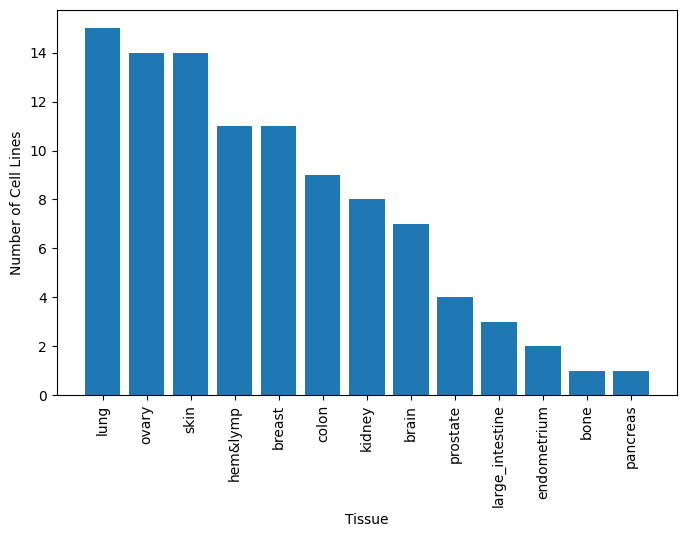

In [30]:
tissue_cell_cnts = cell_line_tissue.groupby('tissue_id').count().sort_values(by='disease_id', ascending=False)['disease_id']

# Create a figure and axis for the plot
plt.figure(figsize=(8, 5))

# Generate the plot with numerical x-values
plt.bar(range(len(tissue_cell_cnts)), tissue_cell_cnts)  # Use numerical indices as x-values

# Set the x-tick labels to the corresponding tissue names, rotating them for better visibility
plt.xticks(range(len(tissue_cell_cnts)), [codes['tissue'].idx2item[tissue_id] for tissue_id in tissue_cell_cnts.index], rotation=90)

# Set the labels for the axes
plt.xlabel('Tissue')
plt.ylabel('Number of Cell Lines')

# Optionally, save the figure
# plt.savefig(data_path + 'tissue_num_cell.png', bbox_inches='tight', dpi=200)

# Show the plot
plt.show()

## Data Preprocessing (5)
### **Cell line's gene expression**

Cell lines are also a part of this project and we will synthesis two datasets. This first dataset is CCLE and can be found here:
https://depmap.org/portal/download/all/

The second dataset used is called COSMIC and can be found here:
https://cancer.sanger.ac.uk/cosmic/download/cosmic


In [31]:
#Mapping
gene_identifiers=pd.read_csv(external_data_path+'genetic_features/cell/gene_identifiers_latest.csv')
cell_line_meta = pd.read_csv(external_data_path+'genetic_features/cell/cell_line_meta.csv')

_codes={}
_codes['gene_id2hgnc_symbol']=gene_identifiers[['gene_id', 'hgnc_symbol']].set_index('gene_id').to_dict('index')
_codes['SANGAR_ID2cell_name']=cell_line_meta.loc[cell_line_meta['name'].isin(codes['cell'].idx2item) & ~cell_line_meta['SANGAR_ID'].isna(), ['SANGAR_ID', 'name']].set_index('SANGAR_ID').to_dict('index')
#Broad institute
fpkm_broad=pd.read_csv(external_data_path+'genetic_features/cell/fpkm_broad.csv')

fpkm_broad=fpkm_broad.loc[fpkm_broad['model_id'].isin(_codes['SANGAR_ID2cell_name'])]#apply(lambda x: _codes['SANGAR_ID2cell_name'].get(x))
fpkm_broad['model_id']=fpkm_broad['model_id'].apply(lambda x: codes['cell'].item2idx[_codes['SANGAR_ID2cell_name'][x]['name']])
fpkm_broad.rename(columns={col:_codes['gene_id2hgnc_symbol'][col]['hgnc_symbol'] for col in fpkm_broad.columns[1:]}, inplace=True)

fpkm_broad.rename(columns={'model_id':'cell_id'}, inplace=True)
fpkm_broad.set_index('cell_id', inplace=True)
(fpkm_broad.sum()>0).sum()

<ipython-input-31-941d48da97aa>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpkm_broad['model_id']=fpkm_broad['model_id'].apply(lambda x: codes['cell'].item2idx[_codes['SANGAR_ID2cell_name'][x]['name']])
<ipython-input-31-941d48da97aa>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpkm_broad.rename(columns={col:_codes['gene_id2hgnc_symbol'][col]['hgnc_symbol'] for col in fpkm_broad.columns[1:]}, inplace=True)
<ipython-input-31-941d48da97aa>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

21494

In [32]:
#Sangar
fpkm_sangar=pd.read_csv(external_data_path+'genetic_features/cell/fpkm_sangar.csv')

fpkm_sangar=fpkm_sangar.loc[fpkm_sangar['model_id'].isin(_codes['SANGAR_ID2cell_name'])]#apply(lambda x: _codes['SANGAR_ID2cell_name'].get(x))
fpkm_sangar['model_id']=fpkm_sangar['model_id'].apply(lambda x: codes['cell'].item2idx[_codes['SANGAR_ID2cell_name'][x]['name']])
fpkm_sangar.rename(columns={col:_codes['gene_id2hgnc_symbol'][col]['hgnc_symbol'] for col in fpkm_sangar.columns[1:]}, inplace=True)

fpkm_sangar.rename(columns={'model_id':'cell_id'}, inplace=True)
fpkm_sangar.set_index('cell_id', inplace=True)
(fpkm_sangar.sum()>0).sum()

<ipython-input-32-afdf32554896>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpkm_sangar['model_id']=fpkm_sangar['model_id'].apply(lambda x: codes['cell'].item2idx[_codes['SANGAR_ID2cell_name'][x]['name']])
<ipython-input-32-afdf32554896>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpkm_sangar.rename(columns={col:_codes['gene_id2hgnc_symbol'][col]['hgnc_symbol'] for col in fpkm_sangar.columns[1:]}, inplace=True)
<ipython-input-32-afdf32554896>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

18421

In [33]:
cell_gene_fpkm= pd.concat([fpkm_broad,fpkm_sangar], sort=True) #integrate BROAD and SANGAR
cell_gene_fpkm=cell_gene_fpkm.loc[:,(cell_gene_fpkm.std(skipna=True)!=0)] #drop genes with std=0
cell_gene_fpkm.fillna(0, inplace=True)

cell_gene_fpkm_norm=((cell_gene_fpkm-cell_gene_fpkm.mean())/cell_gene_fpkm.std()) #z-score, gene-wise

unique_genes_cell = cell_gene_fpkm_norm.columns.to_list()
print(unique_genes_cell)
len(unique_genes_cell)

<ipython-input-33-2874de292690>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_gene_fpkm.fillna(0, inplace=True)


['A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS2', 'A4GALT', 'A4GNT', 'AAAS', 'AACS', 'AACSP1', 'AADAC', 'AADACL2-AS1', 'AADACP1', 'AADAT', 'AAED1', 'AAGAB', 'AAK1', 'AAMDC', 'AAMP', 'AAR2', 'AARD', 'AARS', 'AARS2', 'AARSD1', 'AASDH', 'AASDHPPT', 'AASS', 'AATBC', 'AATF', 'AATK', 'ABALON', 'ABAT', 'ABCA1', 'ABCA10', 'ABCA11P', 'ABCA12', 'ABCA13', 'ABCA17P', 'ABCA2', 'ABCA3', 'ABCA4', 'ABCA5', 'ABCA7', 'ABCA8', 'ABCB1', 'ABCB10', 'ABCB10P1', 'ABCB10P3', 'ABCB10P4', 'ABCB4', 'ABCB5', 'ABCB6', 'ABCB7', 'ABCB8', 'ABCB9', 'ABCC1', 'ABCC10', 'ABCC11', 'ABCC12', 'ABCC2', 'ABCC3', 'ABCC4', 'ABCC5', 'ABCC5-AS1', 'ABCC6', 'ABCC6P1', 'ABCC6P2', 'ABCC8', 'ABCC9', 'ABCD1', 'ABCD2', 'ABCD3', 'ABCD4', 'ABCE1', 'ABCF1', 'ABCF2', 'ABCF3', 'ABCG1', 'ABCG2', 'ABCG5', 'ABHD1', 'ABHD10', 'ABHD11', 'ABHD11-AS1', 'ABHD12', 'ABHD12B', 'ABHD13', 'ABHD14A', 'ABHD14A-ACY1', 'ABHD14B', 'ABHD15', 'ABHD16A', 'ABHD17A', 'ABHD17AP3', 'ABHD17AP4', 'ABHD17AP5', 'ABHD17B', 'ABHD17C', 'ABHD18', 'ABHD2', 'ABHD3',

22393

### **Integrate all genes and save pickles**


In [34]:
codes['gene']=Mapping(set(unique_genes_cell).union(set(unique_genes_drug)))
#number of unique genes
len(codes['gene'].idx2item)

24064

In [35]:
#Update drug's genes
drug['gene_id']=drug['gene'].apply(lambda genes: [codes['gene'].item2idx[gene] for gene in genes])
#subset of drug features
drug[['id', 'smiles', 'fps', 'gene_id']].groupby('id').first().to_pickle(data_path+'drug_features.p')
#Merge cell line's tissue, disease type with gene_id
cell_gene = cell_gene_fpkm_norm.apply(lambda row: {codes['gene'].item2idx[gene]:row[gene] for gene in cell_gene_fpkm_norm.columns}, axis=1).reset_index()
cell_gene.rename(columns={0:'gene_id'}, inplace=True)
cell_gene=cell_gene.groupby('cell_id').first()
cell_line = pd.merge(cell_line_tissue, cell_gene, how='left', on='cell_id')
cell_line['gene_id']=cell_line['gene_id'].apply(lambda x: {} if type(x) is float else x)
cell_line.to_pickle(data_path+'cell_features.p')

In [36]:
pickle.dump(codes, open(data_path+'codes.p', 'wb'))



### **Data exploratory analysis for cell lines**

In [37]:
#Add cell line's tissue info into summary
summary_mean['tissue'] = summary_mean['cell_line_name'].apply(
    lambda x: cell_line_tissue.loc[x, 'tissue_id'] if x in cell_line_tissue.index else None
)


Text(0, 0.5, 'number of blocks')

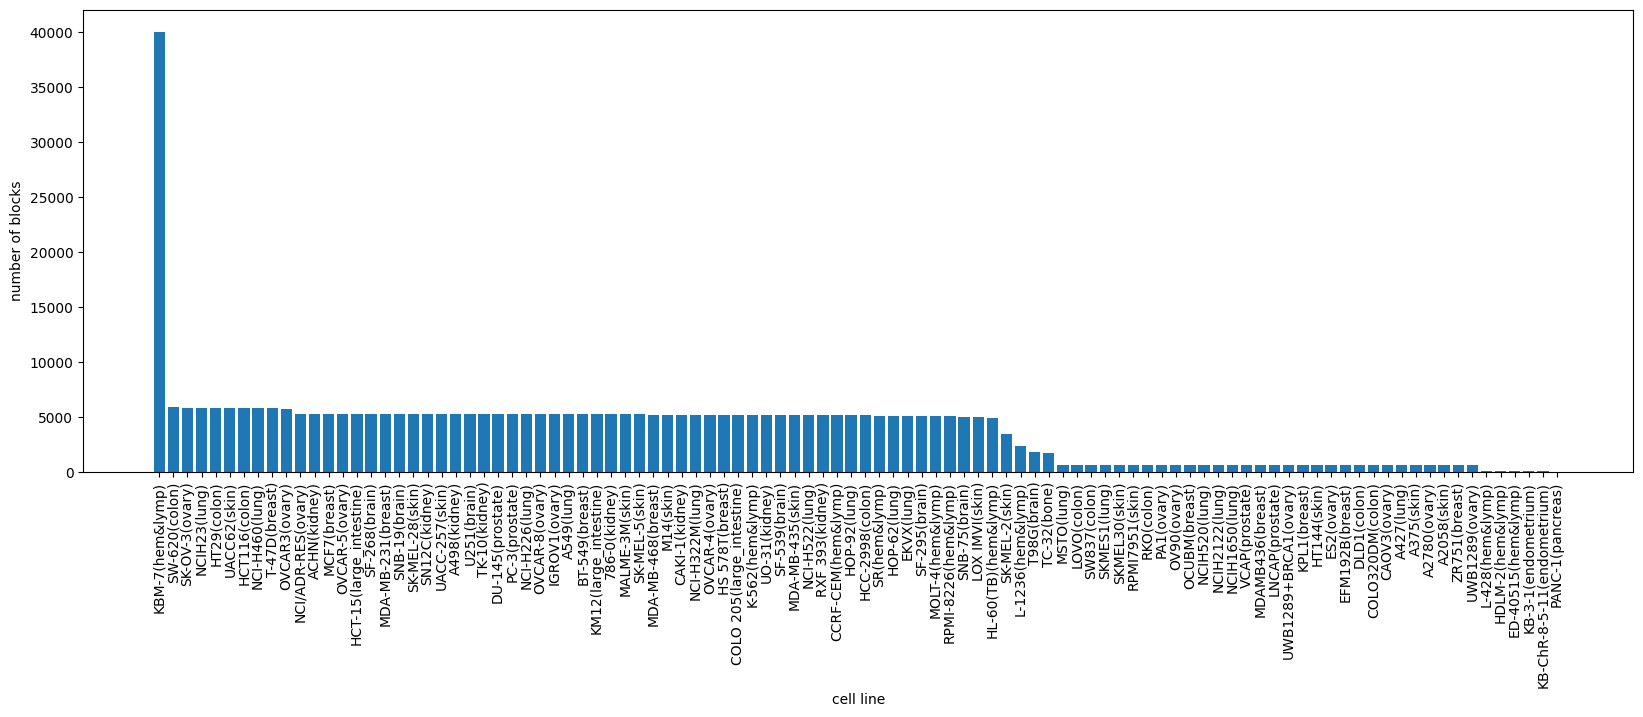

In [38]:
cell_line_exp=summary_mean.groupby('cell_line_name').count()['drug_row'].sort_values(ascending=False)
plt.figure(figsize=(20,6))
plt.bar([codes['cell'].idx2item[cell_id] +'('+codes['tissue'].idx2item[cell_line_tissue.loc[cell_id, 'tissue_id']] +')' for cell_id in cell_line_exp.index], cell_line_exp)
plt.xticks(rotation=90)
plt.xlabel('cell line')
plt.ylabel('number of blocks')


Text(0, 0.5, 'number of drug combinations')

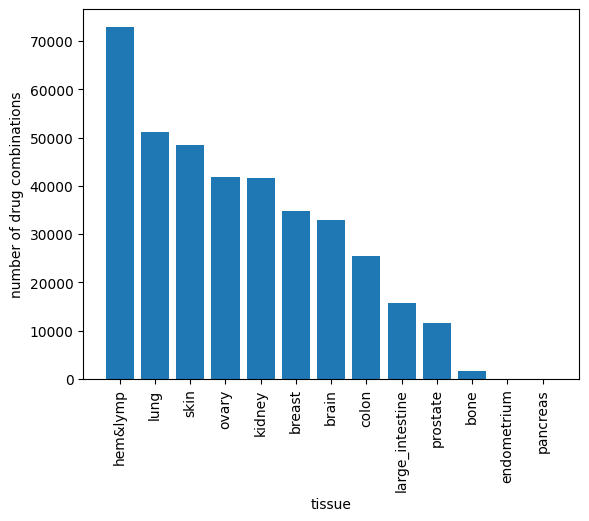

In [39]:
tissue_exp=summary_mean.groupby('tissue').count()['drug_row'].sort_values(ascending=False)

plt.bar([codes['tissue'].idx2item[int(tissue_id)] for tissue_id in tissue_exp.index], tissue_exp)
plt.xticks(rotation=90)
plt.xlabel('tissue')
plt.ylabel('number of drug combinations')
#plt.savefig(data_path+'tissue_num_comb.png', bbox_inches='tight', dpi=200)



In [40]:
study_ids=['', 'ONEIL','CLOUD','ALMANAC','FORCINA','NCATS_ATL','Mathews','NCATS_DIPG','NCATS_ES(FAKi/AURKi)','NCATS_ES(Nampt+PARP)','Wilson','NCATS_HL','Yohe','NCATS_2D_3D','Phelan','NCATS_MDR_CS','CCLE','CTRPv2','FIMM','gCSI','GDSC1','GRAY','UHNBreast','BEATAML'] #from study.csv
num_blocks=summary_mean.groupby(['study_id', 'tissue'], as_index=False)['drug_row'].count().rename(columns={'drug_row':'num_blocks'})
num_blocks['tissue']=num_blocks['tissue'].apply(lambda x: codes['tissue'].idx2item[int(x)])
num_blocks['study_id']=num_blocks['study_id'].apply(lambda x: study_ids[x])

num_blocks_pivot = num_blocks.pivot_table(
    index='study_id',
    columns='tissue',
    values='num_blocks',
    aggfunc='sum'
).fillna(0)
study_ids = ['ALMANAC', 'CLOUD', 'NCATS_HL', 'FORCINA', 'Mathews', 'Wilson', 'Yohe', 'NCATS_MDR_CS', 'Phelan', 'NCATS_ATL', 'NCATS_2D_3D',
             'NCATS_DIPG', 'NCATS_ES(FAKi/AURKi)', 'NCATS_ES(Nampt+PARP)', 'ONEIL']
tissues = ['brain', 'breast', 'colon', 'endometrium', 'hem&lymp', 'kidney', 'lung', 'ovary', 'bone', 'prostate']
num_blocks_pivot = num_blocks_pivot.reindex(index=study_ids, columns=tissues).fillna(0)


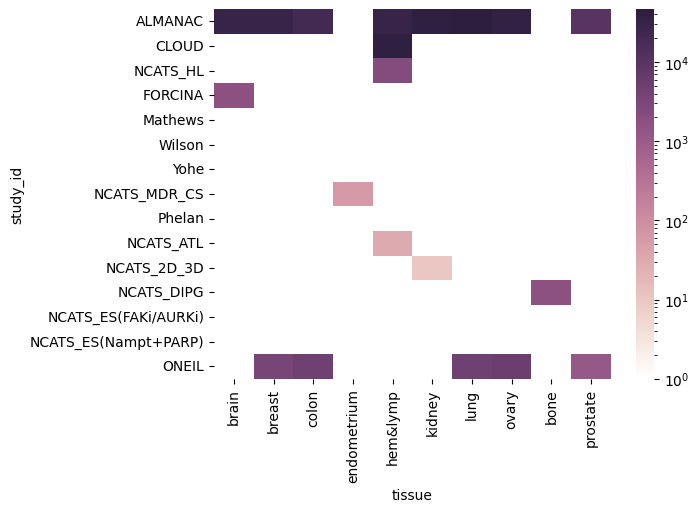

In [41]:
log_norm=LogNorm(vmin=num_blocks_pivot.min().min()+1, vmax=num_blocks_pivot.max().max())
cbar_ticks = [math.pow(10, i) for i in range(math.floor(math.log10(num_blocks_pivot.min().min()+1)), 1+math.ceil(math.log10(num_blocks_pivot.max().max())))]

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

ax=sns.heatmap(num_blocks_pivot.replace(0,1),
           norm=log_norm,
            cbar_kws={'ticks':cbar_ticks},
            cmap=cmap)

#fig=ax.get_figure()
#fig.tight_layout()
#fig.savefig(data_path+'study_heatmap.png', dpi=200)

Text(0, 0.5, 'number of unique drugs')

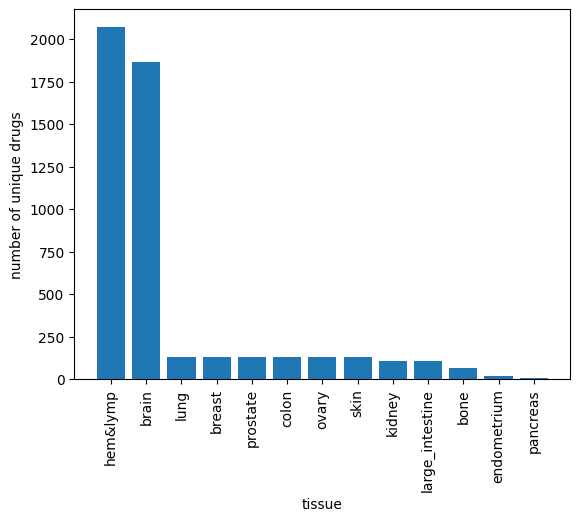

In [42]:
#list unique drugs per tissue
tissue_drugs = pd.merge(summary_mean.groupby('tissue')['drug_row'].apply(set).reset_index(name='drug_row'),
         summary_mean.groupby('tissue')['drug_col'].apply(set).reset_index(name='drug_row'),
         on='tissue')
tissue_drugs['drugs']=tissue_drugs.apply(lambda row: row[1].union(row[2]), axis=1)
tissue_drugs.drop(['drug_row_x','drug_row_y'], axis=1, inplace=True)
tissue_drugs['num_drugs']=tissue_drugs['drugs'].apply(lambda x: len(x))
tissue_drugs.sort_values('num_drugs', ascending=False, inplace=True)
plt.bar([codes['tissue'].idx2item[int(tissue_id)] for tissue_id in tissue_drugs['tissue']], tissue_drugs['num_drugs'])
plt.xticks(rotation=90)
plt.xlabel('tissue')
plt.ylabel('number of unique drugs')
#plt.savefig(data_path+'tissue_num_drugs.png', bbox_inches='tight', dpi=200)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

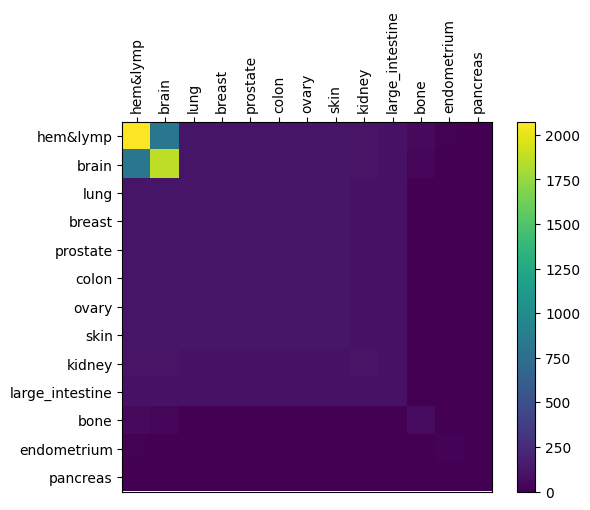

In [43]:
num_intersects=np.zeros((len(tissue_drugs),len(tissue_drugs)))
for i, tissue_id in enumerate(tissue_drugs['tissue']):
    num_intersects[i,:]=tissue_drugs['drugs'].apply(lambda x: len(x.intersection(tissue_drugs.loc[tissue_id, 'drugs']))).values


fig,ax=plt.subplots()
im=ax.imshow(num_intersects)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
ax.set_xticks(np.arange(len(tissue_drugs)))
ax.set_yticks(np.arange(len(tissue_drugs)))
ax.set_xticklabels([codes['tissue'].idx2item[int(tissue_id)] for tissue_id in tissue_drugs['tissue']])
ax.set_yticklabels([codes['tissue'].idx2item[int(tissue_id)] for tissue_id in tissue_drugs['tissue']])

fig.colorbar(im, ax=ax)

plt.setp(ax.get_xticklabels(), rotation=90)
#fig.tight_layout()
#plt.savefig(data_path+'heatmap.png', bb_inches='tight', dpi=200)

#References

1.   Jaeger, S., Duran-Frigola, M. & Aloy, P. Drug sensitivity in cancer cell lines is not tissue-specific.
Mol Cancer 14, 40 (2015).
https://doi-org.proxy2.library.illinois.edu/10.1186/s12943-015-0312-6
2.   Kim, Y., Zheng, S., Tang, J., Jim Zheng, W., Li, Z., & Jiang, X. (2021). Anticancer drug synergy
prediction in understudied tissues using transfer learning. Journal of the American
Medical Informatics Association : JAMIA, 28(1), 42–51.
https://doi.org/10.1093/jamia/ocaa212
3. Yao F, Madani Tonekaboni SA, Safikhani Z, Smirnov P, El-Hachem N, Freeman M, Manem VSK,
Haibe-Kains B. Tissue specificity of in vitro drug sensitivity. J Am Med Inform Assoc.
2018 Feb 1;25(2):158-166. doi: 10.1093/jamia/ocx062. PMID: 29016819; PMCID:
PMC6381764.
4. Zheng, S., Aldahdooh, J., Shadbahr, T., Wang, Y., Aldahdooh, D., Bao, J., Wang, W., & Tang, J.
(2021). Drugcomb update: A more comprehensive drug sensitivity data repository and
Analysis Portal. Nucleic Acids Research, 49(W1). https://doi.org/10.1093/nar/gkab438
5. Kim, Y. (2024). Genetic Features, https://drive.google.com/drive/folders/1ORFe0hw_oVCjnkJupji6ah2HwJGzSe3E?usp=sharing